### Sequential Mode - Batch Mode - Mini-Batch Mode

### Question 1 
Create a dataset like below and visualize it. Here 𝑛=100 points where both classes have similar number of data samples, but not same.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

n = 100
X, y = make_classification(
    n_features=2,
    n_classes=2,
    n_samples=n,
    n_redundant=0,
    n_clusters_per_class=1
)

y[np.where(y == 0)] = -1


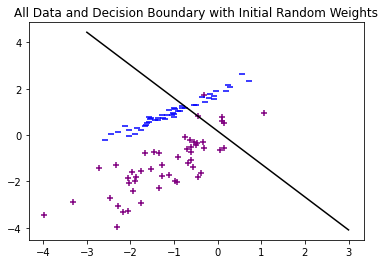

Initial Weights:  [[ 0.14651342]
 [-1.21535153]
 [-0.85469093]]


In [2]:
dimensions_num = X.shape[1]
weights_num = dimensions_num + 1 # 1 is w0
data_num = n
learning_rate = 0.05

X_b = np.c_[np.ones((n, 1)), X] 
initial_weights = np.random.randn(weights_num, 1)

a = -1 * initial_weights[1] / initial_weights[2]
xx = np.linspace(-3, 3) 
yy = a * xx - initial_weights[0] / initial_weights[2]
plt.plot(xx, yy, 'k-')

#plt.scatter(X[:, 0], X[:, 1], c = y, marker = 'o')
plt.scatter(X[y==1, 0], X[y==1, 1], c = 'purple', marker = '+', label='+1')
plt.scatter(X[y==-1, 0], X[y==-1, 1], c = 'blue', marker = '_', label='-1')
plt.title('All Data and Decision Boundary with Initial Random Weights')
plt.show()

print('Initial Weights: ',initial_weights)

### Question 2 
Initialize the weights of the neural network with small random numbers. Use sequential mode to train your Adaline network using below weight update rule with a proper learning rate. Train for 500 iterations and show training error graph. Finally, output the classification accuracy before the training and after the training and the number of epochs. 
### 𝑤(𝑡+1)=𝑤(𝑡)−𝜂(𝑦̂𝑖−𝑦𝑖)𝑥𝑖

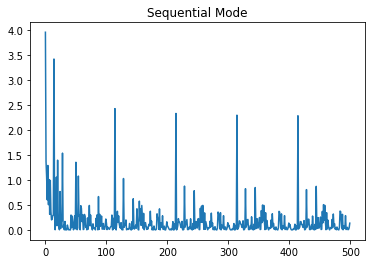

Sequential Weights:  [[ 0.64339914]
 [ 0.56972785]
 [-0.88079282]]


In [3]:
# for sequential mode, the iteration number is equal to epochs number * n
iterations_num = 500
epochs_num = int(iterations_num / n)

# 1.Initialize the weights to initial weights which are small random numbers.
sequentialWeights = initial_weights

sequentialY = []
sequentialError = []

# 2.(For epochs),Each epoch passes over the training set
for epoch in range(epochs_num):
    
    # 3.For each training sample x(i)
    for i in range(data_num):
        
        # 4.Compute the predicted output value y^(i)
        z=sequentialWeights.T.dot(X_b[i])
        sequentialY.append(z)
        
        # 5.Compare y^(i) to the actual output y(i) and Compute the "weight update" value
        # 6.Update the weight coefficients
        for d in range(weights_num):
            sequentialWeights[d]=sequentialWeights[d] -learning_rate * (z - y[i]) * X_b[i][d]
            
        # 7.Calculate error value for each iteration
        sequentialError.append(0.5 *(z-y[i])**2)
        
plt.plot(sequentialError)
plt.title('Sequential Mode')
plt.show()

print('Sequential Weights: ', sequentialWeights)

### Question 3
Initialize the weights of the neural network with small random numbers. Use batch mode to train your Adaline network using below weight update rule with a proper learning rate. Train for 20 iterations and show training error graph. Finally, output the classification accuracy before the training and after the training and the number of epochs. 
### 𝑤(𝑡+1)=𝑤(𝑡)−𝜂1𝑛Σ(𝑦̂𝑖−𝑦𝑖)𝑥𝑖

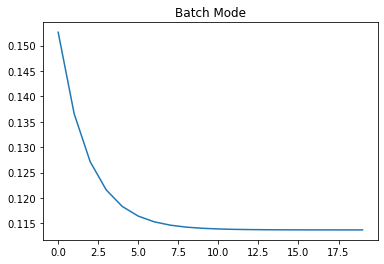

Batch Weights:  [[ 0.77178383]
 [ 0.69811253]
 [-0.75240813]]


In [4]:
# for batch mode, the iteration number is equal to the number of epochs
iterations_num = 20
epochs_num = iterations_num

# 1.Initialize the weights to initial weights which are small random numbers.
batchWeights = initial_weights

batchY = []
batchError = []

# 2.(For epochs),Each epoch passes over the training set
for epoch in range(epochs_num):
    total = 0
    error_total = 0
    
    # 3.For each training sample x(i)
    for i in range(data_num):
        
        # 4.Compute the predicted output value y^(i)
        z=batchWeights.T.dot(X_b[i])
        batchY.append(z)
            
        # 5.Compare y^(i) to the actual output y(i) and Compute the "weight update" value
        for j in range(weights_num):
            total = total + (z - y[i]) * X_b[i][j]
            
        # 6.Add error values of each iteration 
        error_total = error_total + ((z - y[i])**2)
    
    # 7.Update the weight coefficients
    total = total / data_num
    for j in range(weights_num):
        batchWeights[j] = batchWeights[j] - learning_rate * total
        
    # 8.Calculate error value for each epoch
    batchError.append((0.5 * error_total / data_num))

plt.plot(batchError)
plt.title('Batch Mode')
plt.show()

print('Batch Weights: ', batchWeights)

### Question 4
Initialize the weights of the neural network with small random numbers. Use mini-batch mode to train your Adaline network using below weight update rule with a proper learning rate. Use batch size of 10 where 𝑟th batch is the set 𝐵𝑟 and |𝐵𝑟| is the size of the batch, i.e. 10 samples. Train for 100 iterations and show training error graph. Finally, output the classification accuracy before the training and after the training and the number of epochs.
### 𝑤(𝑡+1)=𝑤(𝑡)−𝜂1|𝐵𝑟|Σ(𝑦̂𝑖−𝑦𝑖)𝑥𝑖

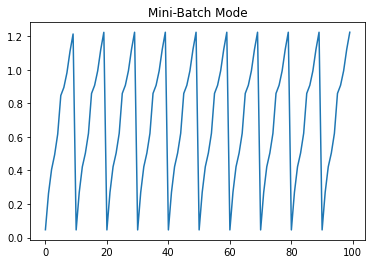

Mini-Batch Weights:  [[ 0.74314087]
 [ 0.66946958]
 [-0.78105109]]


In [5]:
# for mini-batch mode, the iteration number is equal to batch size * epochs number
iterations_num = 100
batch_size = 10
epochs_num = int(iterations_num / batch_size)

# 1.Initialize the weights to initial weights which are small random numbers.
minibatchWeights = initial_weights

minibatchY = []
minibatchError = []

# 2.(For epochs),Each epoch passes over the training set
for epoch in range(epochs_num):
    total = 0
    error_total = 0
    
    # 3.For each training sample x(i)
    for k in range(0, data_num, batch_size):
        for i in range(batch_size):

            # 4.Compute the predicted output value y^(i)
            z=minibatchWeights.T.dot(X_b[k+i])
            minibatchY.append(z)

            # 5.Compare y^(i) to the actual output y(i) and Compute the "weight update" value
            for j in range(weights_num):
                total = total + (z - y[k+i]) * X_b[k+i][j]

            # 6.Add error values of each iteration
            error_total = error_total + ((z - y[k+i])**2)

        
        # 7.Update the weight coefficients
        total = total / batch_size
        for j in range(weights_num):
            minibatchWeights[j] = minibatchWeights[j] - learning_rate * total

        # 8.Calculate error value for each batch set
        minibatchError.append((0.5 * error_total / batch_size))
        
plt.plot(minibatchError)
plt.title('Mini-Batch Mode')
plt.show() 

print('Mini-Batch Weights: ', minibatchWeights)

### Question 5
Use linear regression to classify your data. Compare the weights obtained using linear regression with sequential, batch, and mini-batch Adaline networks.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

lin_reg = LinearRegression()
lin_reg.fit(X, y)
linregY = lin_reg.predict(X)

print('Linear Reggression Weights:')
lin_reg.intercept_, lin_reg.coef_

Linear Reggression Weights:


(0.6344684572116214, array([ 0.66244271, -0.74161111]))

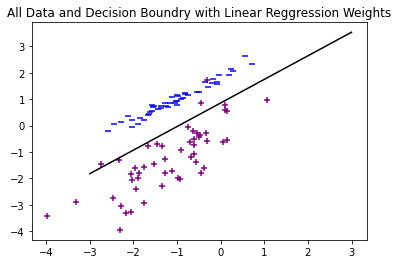

In [7]:
#acc = accuracy_score(y, linregY)
#print('Accuracy of Linear Reggression: %.3f' % acc)

a = -1 * lin_reg.coef_[0] / lin_reg.coef_[1]
xx = np.linspace(-3, 3) 
yy = a * xx - lin_reg.intercept_ / lin_reg.coef_[1]
plt.plot(xx, yy, 'k-')

plt.scatter(X[y==1, 0], X[y==1, 1], c = 'purple', marker = '+', label='+1')
plt.scatter(X[y==-1, 0], X[y==-1, 1], c = 'blue', marker = '_', label='-1')
plt.title('All Data and Decision Boundry with Linear Reggression Weights')
plt.show()

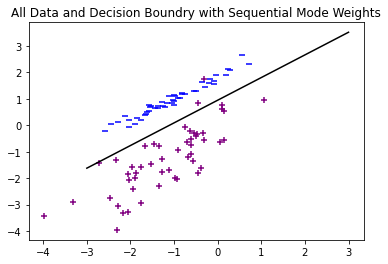

In [8]:
a = -1 * sequentialWeights[1] / sequentialWeights[2]
xx = np.linspace(-3, 3) 
yy = a * xx - sequentialWeights[0] / sequentialWeights[2]
plt.plot(xx, yy, 'k-')

plt.scatter(X[y==1, 0], X[y==1, 1], c = 'purple', marker = '+', label='+1')
plt.scatter(X[y==-1, 0], X[y==-1, 1], c = 'blue', marker = '_', label='-1')
plt.title('All Data and Decision Boundry with Sequential Mode Weights')
plt.show()

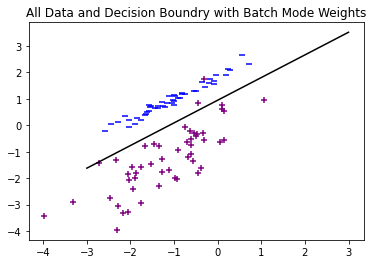

In [9]:
a = -1 * batchWeights[1] / batchWeights[2]
xx = np.linspace(-3, 3) 
yy = a * xx - batchWeights[0] / batchWeights[2]
plt.plot(xx, yy, 'k-')

plt.scatter(X[y==1, 0], X[y==1, 1], c = 'purple', marker = '+', label='+1')
plt.scatter(X[y==-1, 0], X[y==-1, 1], c = 'blue', marker = '_', label='-1')
plt.title('All Data and Decision Boundry with Batch Mode Weights')
plt.show()

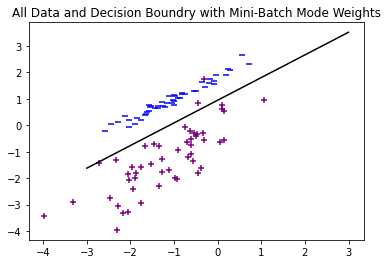

In [10]:
a = -1 * minibatchWeights[1] / minibatchWeights[2]
xx = np.linspace(-3, 3) 
yy = a * xx - minibatchWeights[0] / minibatchWeights[2]
plt.plot(xx, yy, 'k-')

plt.scatter(X[y==1, 0], X[y==1, 1], c = 'purple', marker = '+', label='+1')
plt.scatter(X[y==-1, 0], X[y==-1, 1], c = 'blue', marker = '_', label='-1')
plt.title('All Data and Decision Boundry with Mini-Batch Mode Weights')
plt.show()